# Dimensionality Reduction (Feature Decomposition)

## What is Dimensionality Reduction?
Dimensionality reduction in machine learning is the process of reducing the number of input variables (features) in a dataset while preserving as much relevant information as possible. This is important because high-dimensional data can cause several problems, including increased computational complexity, overfitting, and the "curse of dimensionality."


Dimensionality reduction can be classified into two types:<b>

### 1. **Feature Selection**
   - This involves selecting a subset of the most relevant features from the original dataset. 
   - Common techniques include:
     - **Filter methods:** Selecting features based on statistical criteria (e.g., correlation with the target variable).
     - **Wrapper methods:** Evaluating feature subsets using machine learning models and performance metrics.
     - **Embedded methods:** Selecting features during model training (e.g., Lasso regression).

### 2. **Feature Extraction**
   - Instead of selecting existing features, feature extraction transforms the data into a new lower-dimensional space.
   - Common techniques include:
     - **Principal Component Analysis (PCA):** Reduces dimensions by finding new uncorrelated variables (principal components) that explain the variance in the data.
     - **t-SNE (t-distributed Stochastic Neighbor Embedding):** Primarily used for visualizing high-dimensional data in 2D or 3D space.
     - **Linear Discriminant Analysis (LDA):** Reduces dimensionality by maximizing class separability for classification problems.

### Benefits of Dimensionality Reduction:
- **Improved Performance:** Reducing noise and irrelevant features can help models generalize better.
- **Reduced Computational Cost:** Fewer dimensions mean lower memory and time requirements.
- **Visualization:** It allows for visualizing data in 2D or 3D when working with high-dimensional datasets.

Dimensionality reduction is often used in data preprocessing and is particularly useful in fields like bioinformatics, image processing, and natural language processing, where datasets can be extremely large and complex.

# Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique used in statistics and machine learning to transform high-dimensional data into a lower-dimensional representation, preserving the most important information(maximum variance in original dataset).

## PCA Assumption

Principal Component Analysis (PCA) has several assumptions, including:<br>
- **Linearity**: PCA assumes that the variables in the data set are linearly related. 
- **Correlations**: Some correlation between factors is necessary for PCA. 
- **Outliers**: PCA is sensitive to outliers, so they should be removed. 
- **Covariances**: PCA is based on covariances, which are assumed to be constant over time. 
- **Data normalization**: Data must be normalized before applying PCA, as the scale can affect the results. 

## How Principal Component Analysis (PCA) Work ?
- **Standardize the Data**<br>
If the features of your dataset are on different scales, it’s essential to standardize them (subtract the mean and divide by the standard deviation).

- **Compute the Covariance Matrix**<br>
Calculate the covariance matrix for the standardized dataset.

- **Compute Eigenvectors and Eigenvalues**<br>
Find the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the directions of maximum variance, and the corresponding eigenvalues indicate the magnitude of variance along those directions.

- **Sort Eigenvectors by Eigenvalues**<br>
Sort the eigenvectors based on their corresponding eigenvalues in descending order.

- **Choose Principal Components**<br>
Select the top k eigenvectors (principal components) where k is the desired dimensionality of the reduced dataset.

- **Transform the Data** <br>
Multiply the original standardized data by the selected principal components to obtain the new, lower-dimensional representation of the data.

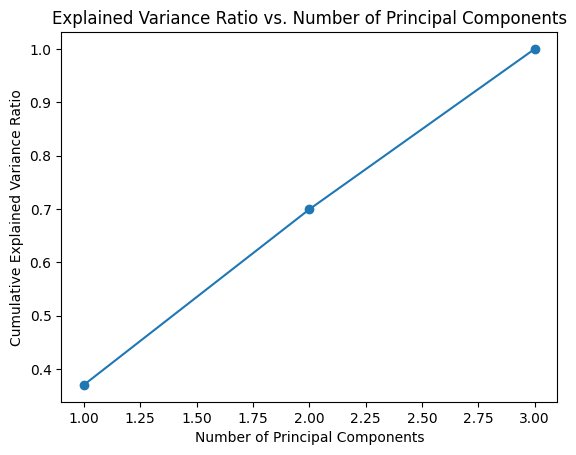

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Example Data
np.random.seed(42)
X = np.random.rand(100, 3)  # 100 samples with 3 features

# Step 1: Standardize the Data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Step 2-5: PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Plot Explained Variance Ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

# Kernel PCA

## What is KPCA?
PCA is a linear method. That is it can only be applied to datasets which are linearly separable. But, if we use it to non-linear datasets, we might get a result which may not be the optimal dimensionality reduction.<br> 
Kernel PCA uses a kernel function to project dataset into a higher dimensional feature space, where it is linearly separable. It is similar to the idea of Support Vector Machines. There are various kernel methods like linear, polynomial, and gaussian. 

Kernel Principal Component Analysis (KPCA) is a technique used in machine learning for nonlinear dimensionality reduction. It is an extension of the classical Principal Component Analysis (PCA) algorithm, which is a linear method that identifies the most significant features or components of a dataset. KPCA applies a nonlinear mapping function to the data before applying PCA, allowing it to capture more complex and nonlinear relationships between the data points.

In KPCA, a kernel function is used to map the input data to a high-dimensional feature space, where the nonlinear relationships between the data points can be more easily captured by linear methods such as PCA. The principal components of the transformed data are then computed, which can be used for tasks such as data visualization, clustering, or classification.

## Advantages
- Non-linearity: Kernel PCA can capture non-linear patterns in the data that are not possible with traditional linear PCA.
- Robustness: Kernel PCA can be more robust to outliers and noise in the data, as it considers the global structure of the data, rather than just local distances between data points.
- Versatility: Different types of kernel functions can be used in kernel PCA to suit different types of data and different objectives.
- It can preserve the most important information in high-dimensional datasets while reducing the dimensionality of the data, making it easier to visualize and analyze.
- Kernel PCA can be used for a variety of tasks, including data visualization, clustering, and classification.
- It is a well-established and widely used technique in machine learning, with many available libraries and resources for implementation.

## Disadvantages
- Complexity: Kernel PCA can be computationally expensive, especially for large datasets, as it requires the calculation of eigenvectors and eigenvalues.
- Model selection: Choosing the right kernel function and the right number of components can be challenging and may require expert knowledge or trial and error
- It may not always be easy to interpret the results of kernel PCA, as the transformed data may not have a clear interpretation in the original feature space.
- Kernel PCA is not suitable for datasets with many missing values or outliers, as it assumes a complete and consistent dataset.

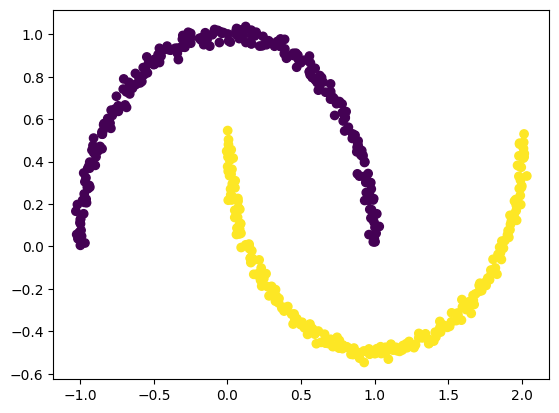

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
 
X, y = make_moons(n_samples=500, noise=0.02, random_state=417)
 
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

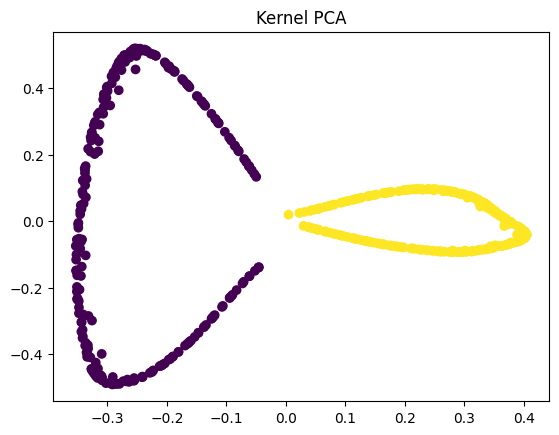

In [5]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)

plt.title("Kernel PCA")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.show()

# Singular Value Decomposition (SVD)

**Singular Value Decomposition (SVD)** is a mathematical technique used for matrix factorization. It decomposes a matrix into three simpler matrices, revealing important properties about the original matrix and enabling tasks such as dimensionality reduction, noise reduction, and feature extraction.

## 1. SVD Definition
Given any matrix  **A** (which can be rectangular or square) with dimensions $ m \times n $, SVD factorizes it as:

$$
A = U \Sigma V^T
$$

Where:
- $ U $ is an $ m \times m $ orthogonal matrix (columns are called **left singular vectors**).
- $ \Sigma $ is an $ m \times n $ diagonal matrix (containing **singular values** of $ A $).
- $ V^T $ is the transpose of an $ n \times n $ orthogonal matrix (columns of $ V $ are called **right singular vectors**).

## 2. Components of SVD
- **Left Singular Vectors ($ U $)**: These are the eigenvectors of $ A A^T $. They describe the patterns or directions in the original data space (e.g., rows of the matrix).
- **Right Singular Vectors ($ V $)**: These are the eigenvectors of $ A^T A $. They describe patterns or directions in the feature space (e.g., columns of the matrix).
- **Singular Values ($ \Sigma $)**: These are the square roots of the non-zero eigenvalues of both $ A^T A $ and $ A A^T $. Singular values represent the importance or strength of each corresponding dimension.

## 3. Geometrical Intuition
SVD rotates the original matrix $ A $ by breaking it into simpler, orthogonal directions (singular vectors) and scales these directions by the singular values. It is akin to applying a rotation (through $ V^T $), scaling (through $ \Sigma $), and another rotation (through $ U $) to the original matrix.

## 4. Applications of SVD

### 1. Dimensionality Reduction
SVD allows you to approximate a matrix by keeping only the largest singular values and their corresponding singular vectors. This is called **truncated SVD**, where smaller singular values are ignored as they contribute less to the data’s overall structure.

- **Example:** In recommendation systems (like Netflix), the user-item matrix can be approximated by fewer dimensions, capturing essential preferences while reducing noise.

### 2. Data Compression
By keeping only the top $ k $ singular values, we can store the matrix in a lower-dimensional form without losing much information. This helps compress data with minimal loss of quality.

### 3. Noise Reduction
The smallest singular values often correspond to noise in the data. By discarding these lower singular values, we can remove noise and keep only the important signal.

### 4. Latent Semantic Analysis (LSA) in NLP
In text processing, SVD is used to identify latent relationships between terms and documents. By decomposing the term-document matrix, SVD can capture underlying structures such as topics in documents.

## 5. SVD for Matrix Approximation
If we want a rank-$ k $ approximation of the matrix $ A $, we take the largest $ k $ singular values and corresponding singular vectors. This yields the best approximation of $ A $ with rank $ k $ in terms of minimizing the Frobenius norm of the difference between $ A $ and the approximation.

If $ A $ has full rank, we can approximate it as:
$$
A_k = U_k \Sigma_k V_k^T
$$
Where $ U_k $, $ \Sigma_k $, and $ V_k^T $ are truncated versions of $ U $, $ \Sigma $, and $ V^T $, keeping only the top $ k $ singular values.

## 6. Example

Consider a 3x2 matrix $ A $:
$$
A = \begin{pmatrix} 3 & 1 \\ 1 & 3 \\ 2 & 2 \end{pmatrix}
$$

The SVD of $ A $ will decompose it into:
$$
A = U \Sigma V^T
$$

Where:
- $ U $ will be a 3x3 orthogonal matrix.
- $ \Sigma $ will be a 3x2 diagonal matrix with singular values.
- $ V^T $ will be a 2x2 orthogonal matrix.

Through SVD, we can use just the top singular values and vectors to approximate the matrix.

## 7. Key Properties of SVD
- **All matrices**: Every real matrix, regardless of whether it is square or rectangular, has an SVD.
- **Orthogonality**: The columns of $ U $ and $ V $ are orthogonal, meaning that each vector is independent of the others.
- **Singular values**: The singular values in $ \Sigma $ are always non-negative and sorted in decreasing order.
  
## 8. Advantages of SVD
- **Guaranteed Existence**: Unlike other decompositions (e.g., eigenvalue decomposition), SVD always exists for any matrix.
- **Optimal for Matrix Approximation**: If you need to reduce the rank of a matrix, SVD provides the best low-rank approximation.
  
SVD is versatile and widely used in data science, signal processing, and many areas of machine learning.



## Key Properties and Assumptions:

1. **Existence**:
   - SVD always exists for any real or complex matrix, whether it is square or rectangular. This is unlike some other matrix decompositions (e.g., eigenvalue decomposition), which require specific properties like the matrix being square or symmetric.

2. **Orthogonality**:
   - The matrices $U$ and $V$ in SVD are orthogonal (or unitary in the complex case), meaning that their columns are orthonormal vectors. This doesn't impose any specific assumption on the data, but the factorization results in these orthogonal matrices.

3. **Rank Assumption**:
   - The rank of the original matrix $A$ determines how many non-zero singular values $\Sigma$ will have. For low-rank matrices, SVD captures this structure by allowing truncated approximations.

4. **No Specific Statistical Distribution**:
   - Unlike methods like **Principal Component Analysis (PCA)** or **Independent Component Analysis (ICA)**, SVD does not make any assumptions about the distribution of the data (e.g., normality or independence). SVD is purely algebraic and decomposes the matrix into its singular values and vectors without regard to probabilistic models.

## What SVD Does **Not** Assume:

- **Square Matrix**: The matrix $A$ can be square or rectangular.
- **Symmetry**: Unlike eigenvalue decomposition, SVD does not require the matrix to be symmetric.
- **Invertibility**: SVD works even if the matrix is singular (i.e., non-invertible) or rank-deficient.
- **Non-Negativity**: SVD does not assume that the data must be non-negative (unlike **Non-Negative Matrix Factorization (NMF)**).

## Limitations (Not Assumptions):
While SVD has no strong assumptions, there are a few practical considerations:

- **Interpretability**: The left and right singular vectors (from $U$ and $V$) can sometimes be difficult to interpret, especially in cases where the data doesn't have clear geometrical or physical meaning.
- **Computational Cost**: For large datasets, SVD can be computationally expensive, involving complex matrix operations with high time and space complexity.


In [6]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Example matrix A (3x2)
A = np.array([[3, 1], 
              [1, 3], 
              [2, 2]])

# Create an instance of TruncatedSVD and specify the number of components (singular values to keep)
svd = TruncatedSVD(n_components=2)  # n_components is the number of singular values to retain

# Fit the model and transform matrix A
A_transformed = svd.fit_transform(A)

# Singular vectors (U)
U_sklearn = A_transformed

# Singular values
Sigma_sklearn = svd.singular_values_

# Right singular vectors (V^T)
Vt_sklearn = svd.components_

# Display the SVD components
print("Matrix A:")
print(A)
print("\nU (Left Singular Vectors):")
print(U_sklearn)
print("\nSigma (Singular Values):")
print(Sigma_sklearn)
print("\nV^T (Right Singular Vectors Transpose):")
print(Vt_sklearn)

# Reconstruct the original matrix A
A_reconstructed = np.dot(U_sklearn, Vt_sklearn)

print("\nReconstructed Matrix A:")
print(A_reconstructed)

Matrix A:
[[3 1]
 [1 3]
 [2 2]]

U (Left Singular Vectors):
[[ 2.82842712  1.41421356]
 [ 2.82842712 -1.41421356]
 [ 2.82842712  0.        ]]

Sigma (Singular Values):
[4.89897949 2.        ]

V^T (Right Singular Vectors Transpose):
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

Reconstructed Matrix A:
[[3. 1.]
 [1. 3.]
 [2. 2.]]


# Linear Discriminant Analysis (LDA)

**Linear Discriminant Analysis (LDA)** is a popular technique used in machine learning for **supervised dimensionality reduction** and **classification**. It aims to find a linear combination of features that characterizes or separates two or more classes of objects or events. Below is a detailed explanation of LDA.

## 1. Purpose of LDA
LDA is primarily used to:
- **Maximize class separability** by projecting data onto a lower-dimensional space.
- **Reduce dimensionality** while retaining as much of the class discriminatory information as possible.
- **Classify** objects into predefined classes.

It works by finding the directions (called **discriminant axes**) that maximize the distance between the means of different classes while minimizing the spread of the data within each class.

## 2. How LDA Works

### Step-by-step Breakdown:
1. **Compute the mean vectors**:
   For each class, compute the mean vector of each feature.

   $$
   \mu_k = \frac{1}{N_k} \sum_{i=1}^{N_k} x_i
   $$

   where $N_k$ is the number of samples in class $k$, and $x_i$ are the feature vectors of class $k$.

2. **Compute the within-class scatter matrix**:
   This measures the spread of each class's data points around its own class mean.

   $$
   S_W = \sum_{k=1}^{K} \sum_{i=1}^{N_k} (x_i - \mu_k)(x_i - \mu_k)^T
   $$
   where $K$ is the number of classes.

3. **Compute the between-class scatter matrix**:
   This measures the spread between the different class means relative to the overall mean.

   $$
   S_B = \sum_{k=1}^{K} N_k (\mu_k - \mu)(\mu_k - \mu)^T
   $$
   where $\mu$ is the mean of all samples (the overall mean).

4. **Compute the discriminant axes**:
   LDA maximizes the **ratio** of between-class scatter to within-class scatter. This leads to an optimization problem that can be solved by computing the **eigenvalues** and **eigenvectors** of the matrix $S_W^{-1} S_B$. The eigenvectors corresponding to the largest eigenvalues define the new feature space.

   The discriminant directions (eigenvectors) are given by:

   $$
   S_W^{-1} S_B \vec{w} = \lambda \vec{w}
   $$

   The largest eigenvectors provide the best directions for class separation.

5. **Project the data onto the new feature space**:
   Once the eigenvectors (discriminant directions) are computed, the data can be projected onto these directions to form the reduced feature space.

   $$
   y = X \cdot W
   $$
   where $X$ is the original data matrix, and $W$ is the matrix of selected eigenvectors (discriminant axes).

### Classification:
After dimensionality reduction, a simple classification technique (e.g., **nearest neighbors**, **logistic regression**) can be applied in the reduced space.

## 3. LDA in Binary vs. Multi-class Classification

- **Binary LDA**: In the case of two classes, LDA finds one linear combination of features that best separates the classes.
- **Multi-class LDA**: When there are more than two classes, LDA can find up to $K-1$ discriminant axes, where $K$ is the number of classes. The projection will be in a space of dimension $K-1$.

## 4. Key Assumptions of LDA
LDA makes several assumptions about the data:
1. **Normality**: The features are normally distributed within each class.
2. **Homogeneity of Variance (Homoskedasticity)**: LDA assumes that the covariance of each class is the same, i.e., the classes share the same covariance matrix.
3. **Linearity**: It assumes that the relationship between the features is linear.
4. **Class Independence**: LDA assumes that the different classes are independent of each other.

## 5. Applications of LDA
LDA is widely used in:
- **Classification**: LDA is used in many classification tasks, such as face recognition, image classification, and medical diagnosis.
- **Dimensionality Reduction**: LDA can reduce the number of features to the most relevant ones, speeding up classification and making the model more interpretable.
- **Text Mining**: In some cases, LDA is used for topic modeling (though it’s different from Latent Dirichlet Allocation, which also abbreviates as LDA).

## 6. LDA vs PCA
While both **Linear Discriminant Analysis (LDA)** and **Principal Component Analysis (PCA)** are dimensionality reduction techniques, they differ fundamentally in their goals:
- **PCA** is an **unsupervised** technique. It finds the principal components that capture the maximum variance in the data, without regard to class labels.
- **LDA** is a **supervised** technique. It focuses on maximizing class separability by considering the labels in the data, making it more suitable for classification tasks.

## 7. Advantages of LDA
- **Maximizes class separability**: LDA is great for classification problems, as it seeks to reduce dimensions while keeping classes as far apart as possible.
- **Fast and efficient**: LDA is computationally efficient and can handle large datasets.
- **Simple and interpretable**: The resulting linear discriminants are easy to interpret, and the method itself is mathematically straightforward.

## 8. Disadvantages of LDA
- **Strong assumptions**: LDA assumes that the data is normally distributed and that all classes share the same covariance matrix, which may not be true for many real-world datasets.
- **Non-linearity**: LDA can only find linear boundaries between classes. It may not perform well on datasets with non-linear class boundaries. In such cases, **Kernel LDA** can be used to introduce non-linear transformations.



In [8]:
## 9. Python Implementation of LDA (Using `scikit-learn`)

# Here’s how you can use LDA in Python for dimensionality reduction and classification using `scikit-learn`:

# ```python
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset (Iris dataset in this example)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the LDA model
lda = LDA(n_components=2)  # Reduce data to 2 dimensions

# Fit the LDA model
X_train_lda = lda.fit_transform(X_train, y_train)

# Transform the test data as well
X_test_lda = lda.transform(X_test)

# Fit a classifier (e.g., Logistic Regression) in the reduced feature space
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_lda)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


# t-Distributed Stochastic Neighbor Embedding (t-SNE)

**t-Distributed Stochastic Neighbor Embedding (t-SNE)** is a powerful and widely-used technique for **non-linear dimensionality reduction** and **data visualization**. It is particularly well-suited for visualizing high-dimensional datasets by projecting them into a lower-dimensional space (usually 2D or 3D), where similar objects are modeled by nearby points and dissimilar objects are modeled by distant points.

## 1. Purpose of t-SNE
t-SNE is designed to:
- **Preserve local structure**: It aims to retain the local neighborhood relationships in the high-dimensional space in the lower-dimensional representation.
- **Visualize high-dimensional data**: It is often used for visualizing complex datasets, such as word embeddings, images, and genetic data.

Unlike traditional methods like PCA, t-SNE captures non-linear relationships between data points, which makes it ideal for exploring patterns in data that aren't linearly separable.

## 2. How t-SNE Works

### Step-by-step Breakdown:

### Step 1: Compute pairwise similarities in the high-dimensional space
1. For each pair of data points, compute the pairwise similarity using a **Gaussian distribution** centered at each point $i$:
   $$
   p_{j|i} = \frac{\exp\left(-\frac{\|x_i - x_j\|^2}{2 \sigma_i^2}\right)}{\sum_{k \neq i} \exp\left(-\frac{\|x_i - x_k\|^2}{2 \sigma_i^2}\right)}
   $$
   where:
   - $x_i$ and $x_j$ are the high-dimensional vectors.
   - $\sigma_i$ is the variance of the Gaussian centered at $x_i$ (determined via **perplexity**, a parameter of t-SNE).
   - $p_{j|i}$ represents the conditional probability that $x_j$ would be chosen as a neighbor of $x_i$ in the high-dimensional space.

2. Symmetrize the pairwise similarities to obtain $p_{ij}$:
   $$
   p_{ij} = \frac{p_{j|i} + p_{i|j}}{2N}
   $$
   where $N$ is the number of data points.

### Step 2: Compute pairwise similarities in the low-dimensional space
In the low-dimensional space, t-SNE models pairwise similarities using a **Student’s t-distribution** (with one degree of freedom, i.e., a Cauchy distribution) to allow for heavy tails, making it more robust to large distances:
   $$
   q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l}(1 + \|y_k - y_l\|^2)^{-1}}
   $$
   where:
   - $y_i$ and $y_j$ are the low-dimensional points corresponding to $x_i$ and $x_j$.
   - $q_{ij}$ is the similarity in the low-dimensional space.

### Step 3: Minimize the Kullback-Leibler (KL) divergence
t-SNE minimizes the **Kullback-Leibler (KL) divergence** between the high-dimensional pairwise similarities $p_{ij}$ and the low-dimensional pairwise similarities $q_{ij}$:
   $$
   KL(P \| Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
   $$
This cost function ensures that pairs of points with high similarity in the original space ($p_{ij}$ is large) are also close in the lower-dimensional space ($q_{ij}$ is large).

### Step 4: Gradient Descent Optimization
t-SNE uses **gradient descent** to minimize the KL divergence and optimize the position of the points in the low-dimensional space. The gradients are computed as:
   $$
   \frac{\partial C}{\partial y_i} = 4 \sum_{j \neq i} (p_{ij} - q_{ij}) (y_i - y_j)(1 + \|y_i - y_j\|^2)^{-1}
   $$
This process iteratively adjusts the positions of points in the low-dimensional space to reduce the cost.

## 3. Key Parameters of t-SNE

- **Perplexity**: Perplexity controls the balance between the local and global aspects of the data and determines the effective number of neighbors considered for each point. It typically ranges between 5 and 50.
- **Learning rate**: The step size in the gradient descent process. Too high a learning rate can result in poor convergence, while too low can lead to slow optimization.
- **Number of iterations**: The number of iterations performed during the gradient descent optimization. More iterations generally lead to better results, but t-SNE is computationally expensive.

## 4. Advantages of t-SNE
- **Captures non-linear relationships**: t-SNE is excellent for revealing the non-linear relationships in the data, such as clusters or manifolds.
- **Visualizes complex data**: It is highly effective for visualizing high-dimensional data in 2D or 3D, often revealing patterns that are difficult to detect with linear methods like PCA.

## 5. Disadvantages of t-SNE
- **Computationally expensive**: t-SNE is slow and may not scale well to very large datasets due to the pairwise similarity computations.
- **Loss of global structure**: While t-SNE preserves local structure well, it sometimes struggles to preserve global relationships between clusters (e.g., relative distances between faraway points).
- **Sensitive to hyperparameters**: Results can vary significantly depending on the choice of perplexity and other hyperparameters.


## Key Assumptions of t-Distributed Stochastic Neighbor Embedding (t-SNE)

1. **Local Structure Preservation**:
   - t-SNE assumes that the local relationships among data points are more important than the global structure. It aims to maintain the distances between nearby points while allowing more flexibility in how far apart distant points can be.

2. **Gaussian Distribution for High-Dimensional Similarities**:
   - t-SNE assumes that the conditional probabilities of point similarities in the high-dimensional space can be modeled using a Gaussian distribution. Each data point is treated as having a Gaussian neighborhood centered around it, where the spread is determined by the perplexity parameter.

3. **Heavy-Tailed Distribution for Low-Dimensional Similarities**:
   - t-SNE assumes that in the low-dimensional embedding, the pairwise similarities can be modeled using a **Student's t-distribution** (with one degree of freedom), which allows for heavy tails. This distribution helps prevent the clustering of points that are not similar, maintaining distances between distinct clusters.

4. **Meaningful Local Neighborhoods**:
   - t-SNE assumes that for each data point, there are meaningful local neighbors. The **perplexity** parameter controls how many neighbors are considered, implying that a suitable number of local points should exist for effective clustering.

5. **Distance Metric**:
   - t-SNE assumes that the **Euclidean distance** is a relevant and meaningful metric for the data points in high-dimensional space, which can influence the similarity computations.

6. **Robustness to Noise**:
   - t-SNE assumes that the presence of noise in high-dimensional data does not significantly affect the identification of meaningful structures (clusters or manifolds).

7. **Feature Scaling**:
   - While not an explicit assumption, t-SNE assumes that features are on a similar scale. Data preprocessing (such as normalization) is typically recommended to ensure comparability among features.

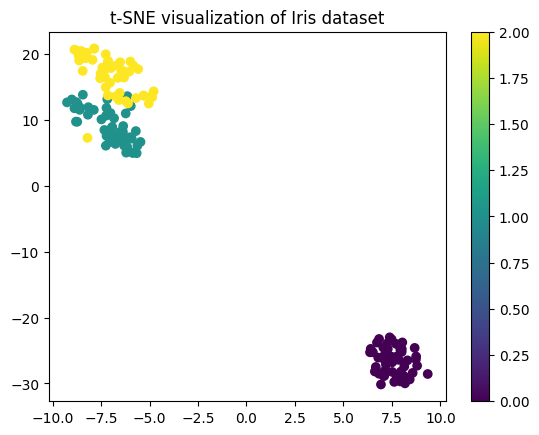

In [9]:
## 6. Python Implementation of t-SNE (Using `scikit-learn`)

# Here’s how you can use t-SNE in Python for dimensionality reduction and visualization using `scikit-learn`:

# ```python
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load dataset (Iris dataset in this example)
data = load_iris()
X = data.data
y = data.target

# Initialize and fit t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the result
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.title('t-SNE visualization of Iris dataset')
plt.show()
